# Limpieza de base de datos de Sharks (ataques de tiburón a nivel mundial)

Requisitos:

1) Borrar columnas sí y sólo sí len(NaN)>80%

2) Mínimo de filas: 6000

3) Incluir: eliminar duplicados, tener mismo tipo de dato, eliminar valores nulos...


Importamos las librerías que podemos llegar a usar

In [1]:
%pip install seaborn

%matplotlib inline

%pip install requests 

%pip install openpyxl

%pip install xlrd

%pip install regex

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import warnings
warnings.filterwarnings('ignore')

import regex as re

import pylab as plt
import seaborn as sns

Cargamos la base de datos como csv para trabajarlo

In [3]:
df = pd.read_csv('../Data/attacks.csv', encoding='latin1')

In [4]:
df.head(10)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,NaN,NaN
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,NaN,NaN
9,2018.05.26.a,26-May-2018,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,12,Minor injury to foot,N,14h00,NaN,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.a,2018.05.26.a,6294.0,NaN,NaN


Se procede a definir parámetros básicos del df así como a crear una copia para trabajarla sin tocar la original

In [5]:
df1=df.copy()

In [6]:
df1.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [7]:
df1.shape

(25723, 24)

# LIMPIEZA 

# 1) Duplicados

Comprobar si hay duplicados y eliminarlos para trabajar sobre datos particulares

In [8]:
df1.drop_duplicates(inplace=True) 

In [9]:
df1.shape

(6312, 24)

La lista contenía muchas filas vacías de forma repetitiva que no aportaban información por lo que se han eliminado

# 2) Eliminación de nulos

2) Búsqueda de nulos para tomar decisiones de eliminación de datos. Primero por columnas y luego por filas

In [10]:
nancols = df1.isnull().sum()

nancols[nancols>0]

Case Number                  2
Date                        10
Year                        12
Type                        14
Country                     60
Area                       465
Location                   550
Activity                   554
Name                       220
Sex                        575
Age                       2841
Injury                      38
Fatal (Y/N)                549
Time                      3364
Species                   2848
Investigator or Source      27
pdf                         10
href formula                11
href                        10
Case Number.1               10
Case Number.2               10
original order               3
Unnamed: 22               6311
Unnamed: 23               6310
dtype: int64

Se observa que las columnas 'unnamed: 22' y 'unnamed: 23' tienen casi la totalidad de sus datos nulos por lo que podemos prescindir de estas dos columnas ya que no aportan información. El resto de columnas tienen menos del 80% de nulos por lo que no podemos eliminarlas según los requisitos

In [11]:
df1.drop(['Unnamed: 22','Unnamed: 23'], axis=1, inplace=True)

df1.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

Se procede a comprobar si hay filas con elevado numero de nulos (>90% de 22 columnas) para eliminarlas al no aportar información

In [12]:
nanrows = df1.isnull().sum(axis=1)

nanrows= nanrows[nanrows>=20]

nanrows

6302     20
6303     20
6304     20
6305     20
6306     20
6307     20
6308     20
6309     21
8702     22
25722    21
dtype: int64

In [13]:
nanrowslist= list(nanrows.index)

In [14]:
df1.drop(nanrowslist, axis=0, inplace=True)

In [15]:
df1.shape

(6302, 22)

# 3) Búsqueda de nulos y reemplazo de valores

Ya se ha comprobado que hay valores nulos en muchas columnas así que hay que reemplazarlos por otros valores

In [16]:
nancols

Case Number                  2
Date                        10
Year                        12
Type                        14
Country                     60
Area                       465
Location                   550
Activity                   554
Name                       220
Sex                        575
Age                       2841
Injury                      38
Fatal (Y/N)                549
Time                      3364
Species                   2848
Investigator or Source      27
pdf                         10
href formula                11
href                        10
Case Number.1               10
Case Number.2               10
original order               3
Unnamed: 22               6311
Unnamed: 23               6310
dtype: int64

Los datos nulos de estas columnas se sustituirán por 'unknown' o'not declared' para tener la tabla sin vacíos pero hay que renombrar algunos nombres de columna para poder referirnos a ellas (contienen espacios)

In [17]:
df1.columns=[c.lower().replace(' ', '_') for c in df1.columns]

df1.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex_', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order'],
      dtype='object')

Se ha encontrado que la variable sex y species tenían un espacio que ha sido renombrado con un '_'. También se modifica la variable fatal_(y/n) por error de transcripción. Se han modificado para tener el nombre correctamente

In [18]:
df1.rename(columns={'sex_': 'sex','species_': 'species', 'fatal_(y/n)': 'fatal'}, inplace=True)

df1.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal', 'time', 'species',
       'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order'],
      dtype='object')

Se cambia el nombre de los nulos de las columnas categóricas y alguna numérica: se añade 'not declared' a los datos nulos sobre datos personales de los afectados y 'unknown' para el resto de valores nulos que son de origen desconocido.

In [19]:
df1.fillna({'case_number': 'unknown', 'type': 'unknown', 'country': 'unknown', 'area': 'unknown', 'location': 'unknown', 'activity': 'unknown', 'name': 'not declared', 'sex': 'not declared', 'injury': 'unknown', 'fatal': 'unknown', 'time': 'unknown', 'species': 'unknown', 'investigator_or_source': 'unknown', 'pdf': 'unknown', 'href_formula': 'unknown', 'href': 'unknown'}, inplace=True)

Para columnas numéricas tales como date, year and age se investiga primero el tipo de dato y se trabaja a partir de él. Empezamos con year, que es float y lo queremos en int para tener todos los valores por año correctamente. Sus valores nulos serán ceros para poder trabajar con la columna.

In [20]:
df1.year.unique()

array([2018., 2017.,   nan, 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
       2001., 2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994.,
       1993., 1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986.,
       1985., 1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976.,
       1975., 1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966.,
       1965., 1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957.,
       1956., 1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948.,
       1848., 1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940.,
       1939., 1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931.,
       1930., 1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922.,
       1921., 1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913.,
       1912., 1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904.,
       1903., 1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895.,
       1894., 1893.,

In [21]:
df1.fillna({'year': 0.0}, inplace=True)

In [22]:
df1['year'] = df1['year'].astype(int)

In [23]:
df1.year.unique()

array([2018, 2017,    0, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998,
       1997, 1996, 1995, 1984, 1994, 1993, 1992, 1991, 1990, 1989, 1969,
       1988, 1987, 1986, 1985, 1983, 1982, 1981, 1980, 1979, 1978, 1977,
       1976, 1975, 1974, 1973, 1972, 1971, 1970, 1968, 1967, 1966, 1965,
       1964, 1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954,
       1953, 1952, 1951, 1950, 1949, 1948, 1848, 1947, 1946, 1945, 1944,
       1943, 1942, 1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933,
       1932, 1931, 1930, 1929, 1928, 1927, 1926, 1925, 1924, 1923, 1922,
       1921, 1920, 1919, 1918, 1917, 1916, 1915, 1914, 1913, 1912, 1911,
       1910, 1909, 1908, 1907, 1906, 1905, 1904, 1903, 1902, 1901, 1900,
       1899, 1898, 1897, 1896, 1895, 1894, 1893, 1892, 1891, 1890, 1889,
       1888, 1887, 1886, 1885, 1884, 1883, 1882, 1881, 1880, 1879, 1878,
       1877, 1876, 1875, 1874, 1873, 1872, 1871, 18

Al observar los valores únicos de la columna, comprobamos que hay años incorrectos, como el 500; 77 y 5. Dado que son valores erróneos, se descartarán. Se toma la decisión de cambiarlos junto a los 0 por 'unknown'. Esta columna, por lo tanto, no será completamente de valores int, será un objeto.

In [24]:
df1['year'] = df1['year'].apply(str)

In [25]:
df1.year.replace({'0': 'unknown', '5': 'unknown', '500': 'unknown', '77': 'unknown'}, inplace=True)

In [26]:
df1.year.unique()

array(['2018', '2017', 'unknown', '2016', '2015', '2014', '2013', '2012',
       '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004',
       '2003', '2002', '2001', '2000', '1999', '1998', '1997', '1996',
       '1995', '1984', '1994', '1993', '1992', '1991', '1990', '1989',
       '1969', '1988', '1987', '1986', '1985', '1983', '1982', '1981',
       '1980', '1979', '1978', '1977', '1976', '1975', '1974', '1973',
       '1972', '1971', '1970', '1968', '1967', '1966', '1965', '1964',
       '1963', '1962', '1961', '1960', '1959', '1958', '1957', '1956',
       '1955', '1954', '1953', '1952', '1951', '1950', '1949', '1948',
       '1848', '1947', '1946', '1945', '1944', '1943', '1942', '1941',
       '1940', '1939', '1938', '1937', '1936', '1935', '1934', '1933',
       '1932', '1931', '1930', '1929', '1928', '1927', '1926', '1925',
       '1924', '1923', '1922', '1921', '1920', '1919', '1918', '1917',
       '1916', '1915', '1914', '1913', '1912', '1911', '1910', '1909',
   

In [27]:
df1.year

0          2018
1          2018
2          2018
3          2018
4          2018
         ...   
6297    unknown
6298    unknown
6299    unknown
6300    unknown
6301    unknown
Name: year, Length: 6302, dtype: object

Para los valores nulos de 'age' se van a sustituir por un valor, pero hay que valorar si es mejor la media, la mediana o la moda. Para ello vamos a establecer un gráfico de distribución de puntos pero antes tenemos que arreglar la columna de 'age', ya que contiene todo tipo de datos.

In [28]:
df1.age.value_counts()

17                154
18                150
19                142
20                141
15                139
                 ... 
20?                 1
 28                 1
7      &    31      1
 30                 1
13 or 14            1
Name: age, Length: 157, dtype: int64

En los datos se observan registros que incluían más de una persona en el mismo registro, por lo que deberían registrarse nuevas entradas en el dataframe para estas personas. Finalmente, se ha cogido una única persona por no presuponer la misma información para varias personas. Vamos a quedarnos sólo con los valores numéricos de 1 ó 2 cifras.

In [29]:
def split_age(age):
    try:
        return re.findall('^(?:\d{1,2})(?!\d\d)', age)
    except:
        return [np.nan]

listage = df1['age'].apply(split_age)

listage = listage.to_list()

listage2 = []

for i in listage:
    if len(i) == 1:
        for j in i:
            listage2.append(j)
    elif len(i) == 0:     
        listage2.append(np.nan)        
    else:
        listage2.append(np.nan)
      
df1['newage']= listage2

df1.newage.unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '13', '42', '3', '8', '50',
       '16', '82', '73', '68', '51', '39', '58', '47', '61', '65', '36',
       '66', '43', '9', '72', '59', '6', '27', '64', '23', '71', '44',
       '62', '63', '70', '53', '77', '74', '5', '86', '84', '75', '87',
       '67', '1', '2', '81', '78'], dtype=object)

Ahora que tenemos los valores organizados vamos a investigar por qué valor sustituir los nulos (si es que merece la pena sustituirlos). Para ello vamos a hacer primero un gráfico de outliers en diagrama de caja.

<AxesSubplot: >

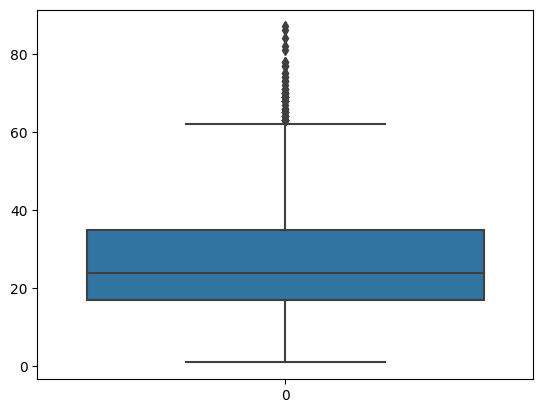

In [30]:
sns.boxplot(df1.newage)

En el gráfico se observa que hay varios outliers fuera de los límites de la caja, por lo que utilizar la media como valor para sustituir los nulos no es buena idea. Vamos a realizar un gráfico de distribución para ver cómo se distribuyen las edades.

<AxesSubplot: xlabel='newage', ylabel='Density'>

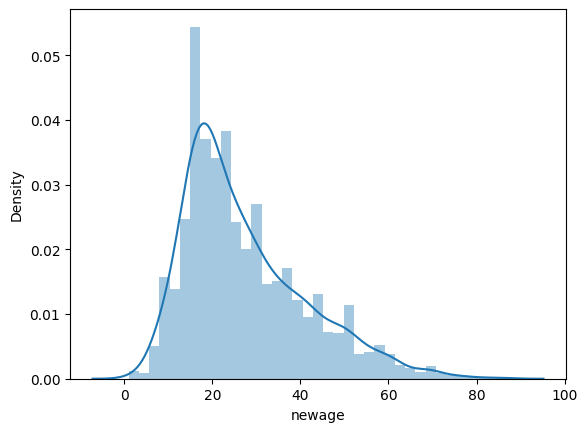

In [31]:
sns.distplot(df1.newage)

Se observa que la población de edades está sesgada y no sigue la distribución normal, confirmando que emplear la media no es una buena opción. Extraemos la mediana y la moda de los valores.

In [32]:
print("La moda es: ",df1.newage.mode())
print("La mediana es: ", df1.newage.median())

La moda es:  0    17
Name: newage, dtype: object
La mediana es:  24.0


Dado que la mayor parte de la población se encuentra entre los 17-24 años, lo óptimo sería escoger la mediana ya que se acerca más a las edades superiores y normalizaría ligeramente la distribución. Pero dado que los valores nulos suponen casi la mitad de los valores de la lista, es preferible dejarlos como 'not declared' para no tenerlos en cuenta.

In [33]:
df1.newage.value_counts(dropna=False)

NaN    2871
17      156
18      153
20      150
19      142
       ... 
87        1
67        1
72        1
81        1
86        1
Name: newage, Length: 82, dtype: int64

In [34]:
df1.newage.fillna('not declared', inplace=True)

Por último, rellenaríamos también la columna de 'age' igual que 'newage' para no tener ningún tipo de dato nulo.

In [35]:
df1.age.fillna('not declared', inplace=True)

Comprobamos que no existen nulos en el DataFrame

In [36]:
df1.isnull().values.any()

False

In [37]:
df1.shape

(6302, 23)

# 4) Valores atípicos, incongruentes y/o mal reportados

Hay valores que están mal escritos, detallados o que no pueden tenerse en cuenta al no estar incluídos como deberían. Vamos a arreglarlos.

Por ejemplo, en la columna de 'sex' hay 6 valores que no encajan con las dos posibilidades (M/F). Vamos a asumir que 'M ' y 'N' se refieren a 'M, y descartar 'lli' y '.' como valores

In [38]:
df1.sex.value_counts()

M               5094
F                637
not declared     565
M                  2
N                  2
lli                1
.                  1
Name: sex, dtype: int64

In [39]:
df1.sex.replace({'M ': 'M', 'N': 'M', 'lli': 'not declared', '.': 'not declared'}, inplace=True)

df1.sex.value_counts()

M               5098
F                637
not declared     567
Name: sex, dtype: int64

Repetimos este proceso pero para los valores de Y/N de fatal. Se unifican los 'unknown' en minúscula, se devuelven los ' N', 'M' y 'N ' como 'N', y el 'y' como 'Y'. El dato numérico '2017' se cambia a 'unknown'

In [40]:
df1.fatal.value_counts()

N          4293
Y          1388
unknown     539
UNKNOWN      71
 N            7
M             1
2017          1
N             1
y             1
Name: fatal, dtype: int64

In [41]:
df1.fatal.replace({' N': 'N', 'N ': 'N', 'M ': 'N', 'y': 'Y', 'UNKNOWN': 'unknown', '2017': 'unknown', 'M': 'N'}, inplace=True)

df1.fatal.value_counts()

N          4302
Y          1389
unknown     611
Name: fatal, dtype: int64

In [42]:
df1.shape

(6302, 23)

# 5) Establecer nuevas variables

En base a la fecha aportada por la columna date, se extraerán las columnas de mes y año ya que pueden aportar información adicional. A pesar de que la columna año ya está registrada, se va a trabajar desde la columna date para tener la columna trabajada y así evitar dudas o errores. De esta manera se podrán estudiar estas variables independientemente, siempre que estén registradas como tal en la columna date.

In [43]:

def split_year(year):
    try:
        return re.findall('(\d{4})', year)
    except:
        return [np.nan]

listayear = df1['date'].apply(split_year)

listayear = listayear.to_list()

print(len(listayear))

lista = []

for i in listayear:
    for j in i:
        lista.append(i)

 
        
print(len(lista))




6302
6328


Al intentar extraer los años de las fechas del DataFrame, se obtienen 26 valores más de los debidos, siendo indicador de que varias casillas contienen más de un año en ellas. Esto se investiga y se comprueba que hay muchos años que no están especificados, incluyendo varias posibilidades para el mismo caso. Por lo tanto, se considerarán como desconocidos para poder trabajar la tabla.

In [44]:
listayear = df1['date'].apply(split_year)

listayear = listayear.to_list()

print(len(listayear))

lista = []
listadupl = []

for i in listayear:
    if len(i) == 1:
        lista.append(i)
    elif len(i) == 0:
        lista.append(i)        
    else:
        listadupl.append(i)
 
        
print(len(lista))
print(len(listadupl))

print(listadupl)

6302
6259
43
[['1985', '1986'], ['1960', '1961'], ['1958', '1959'], ['1954', '1954'], ['1954', '1954'], ['1952', '1954'], ['1951', '1951'], ['1950', '1951'], ['1949', '1949'], ['1949', '1950'], ['1943', '1943'], ['1942', '1942'], ['1928', '1928'], ['1925', '1925'], ['1923', '1924'], ['1909', '1909'], ['1898', '1899'], ['1883', '1843', '1844'], ['1888', '1868'], ['1853', '1854'], ['1850', '1852'], ['1839', '1840'], ['1600', '1728'], ['1990', '1991'], ['1880', '1899'], ['1951', '1963'], ['1896', '1913'], ['1926', '1936'], ['1941', '1945'], ['1943', '1945'], ['1941', '1945', '1945'], ['1941', '1945'], ['1941', '1945'], ['1941', '1942'], ['1940', '1950'], ['1940', '1950'], ['1940', '1950'], ['1940', '1946'], ['1918', '1939'], ['1920', '1923'], ['1900', '1905'], ['1883', '1889'], ['1845', '1853']]


Se resuelve comprobando la longitud de los valores, agregando los valores únicos o sin valor. El resto serán valores desconocidos (unknown)

In [45]:
listayear = df1['date'].apply(split_year)

listayear = listayear.to_list()

lista2=[]

for i in listayear:
    if len(i) == 1:
        for j in i:
            lista2.append(j)
    elif len(i) == 0:     
        lista2.append('unknown')        
    else:
        lista2.append('unknown')


df1['yeardate'] = lista2


Ahora que tenemos una columna con los años extraídos de las fechas aportadas, podemos establecer criterios más rígidos para los años ya que algunos datos indicaban fechas sin concretar o rangos de años que no podían utilizarse a nivel estadístico.

In [46]:
df1.yeardate.head(10)

0    2018
1    2018
2    2018
3    2018
4    2018
5    2018
6    2018
7    2018
8    2018
9    2018
Name: yeardate, dtype: object

Se repite el proceso para obtener los meses de cada fecha para utilizarlos a nivel estadístico en una nueva columna. Una vez hemos creado la nueva columna, observamos los valores que hay y los transcribimos. -Ame se tomará como unknown.

In [47]:

def split_month(month):
    try:
        return re.findall('(-[A-Z][a-z][a-z])', month)
    except:
        return [np.nan]

listames = df1['date'].apply(split_month)

listames = listames.to_list()

listames2=[]

for i in listames:
    if len(i) == 1:
        for j in i:
            listames2.append(j)
    elif len(i) == 0:     
        listames2.append('unknown')        
    else:
        listames2.append('unknown')
            
df1['monthdate']= listames2

df1.monthdate.value_counts()


unknown    893
-Jul       625
-Aug       555
-Sep       522
-Jan       495
-Jun       475
-Apr       422
-Dec       417
-Oct       417
-Mar       380
-Nov       378
-May       365
-Feb       357
-Ame         1
Name: monthdate, dtype: int64

In [48]:
df1.monthdate.replace({'-Jul': 'July', '-Aug': 'August', '-Sep': 'September', '-Jan': 'January', '-Jun': 'June', '-Apr': 'April', '-Dec': 'December', '-Oct': 'October', '-Mar': 'March', '-Nov': 'November', '-May': 'May', '-Feb': 'February', '-Ame': 'unknown'}, inplace=True)

df1.monthdate.value_counts()

unknown      894
July         625
August       555
September    522
January      495
June         475
April        422
December     417
October      417
March        380
November     378
May          365
February     357
Name: monthdate, dtype: int64

In [49]:
df1.shape

(6302, 25)

# DATAFRAME FINAL

Ahora que hemos hecho la limpieza de datos, vamos a quedarnos con las columnas importantes para establecer objetivos estadísticos y poder dar resultados acerca de la información del dataframe.

In [50]:
dff=df1.copy()

In [51]:
dff.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal', 'time', 'species',
       'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'newage',
       'yeardate', 'monthdate'],
      dtype='object')

In [52]:
dff.drop(['case_number','date','year','location','name','age','investigator_or_source','pdf','href_formula','href','case_number.1','case_number.2','original_order'], axis=1, inplace=True)


In [53]:
dff.rename(columns={'type': 'attack_type','newage': 'age', 'yeardate': 'year', 'monthdate': 'month'}, inplace=True)

dff

,attack_type,country,area,activity,sex,injury,fatal,time,species,age,year,month
0,Boating,USA,California,Paddling,F,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,57,2018,June
1,Unprovoked,USA,Georgia,Standing,F,Minor injury to left thigh,N,14h00 -15h00,unknown,11,2018,June
2,Invalid,USA,Hawaii,Surfing,M,Injury to left lower leg from surfboard skeg,N,07h45,unknown,48,2018,June
3,Unprovoked,AUSTRALIA,New South Wales,Surfing,M,Minor injury to lower leg,N,unknown,2 m shark,not declared,2018,June
4,Provoked,MEXICO,Colima,Free diving,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N,unknown,"Tiger shark, 3m",not declared,2018,June
...,...,...,...,...,...,...,...,...,...,...,...,...
6297,Unprovoked,AUSTRALIA,Western Australia,Diving,M,FATAL,Y,unknown,unknown,not declared,1903,unknown
6298,Unprovoked,AUSTRALIA,Western Australia,Pearl diving,M,FATAL,Y,unknown,unknown,not declared,1903,unknown
6299,Unprovoked,USA,North Carolina,Swimming,M,FATAL,Y,unknown,unknown,not declared,unknown,unknown
6300,Unprovoked,PANAMA,unknown,unknown,M,FATAL,Y,unknown,unknown,not declared,unknown,unknown


In [54]:
dff.to_csv('../data/Sharksclean.csv', index=False)